In [1]:
# added new env using these instructions: https://medium.com/@nrk25693/how-to-add-your-conda-environment-to-your-jupyter-notebook-in-just-4-steps-abeab8b8d084

In [ ]:
import geopandas as gpd

In [3]:
import rasterio
import matplotlib.pyplot as plt

file = rasterio.open('data/30N000E_20101117_gmted_mea075.tiff')
dataset = file.read()
print(dataset.shape)

(1, 9600, 14400)


In [16]:
plt.rcParams["figure.figsize"] = (20,10)

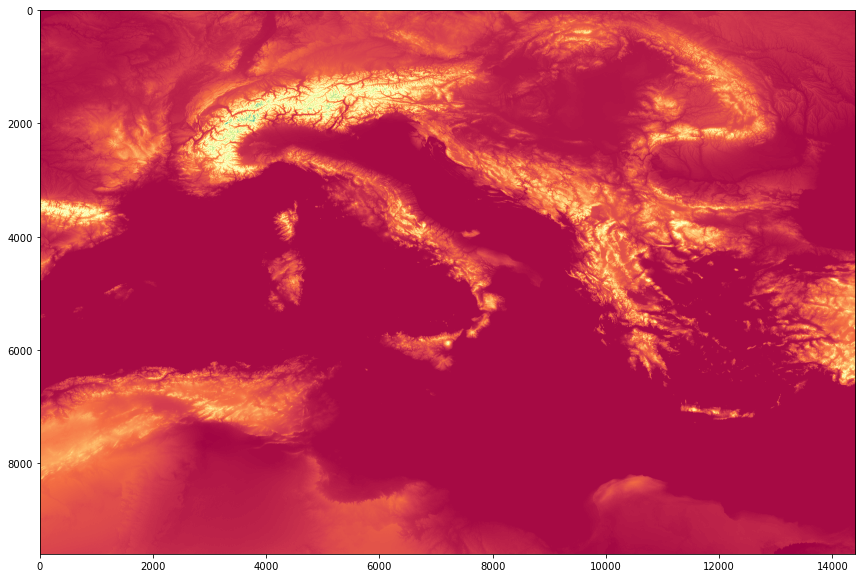

In [17]:
plt.imshow(dataset[0], cmap='Spectral')
plt.show()

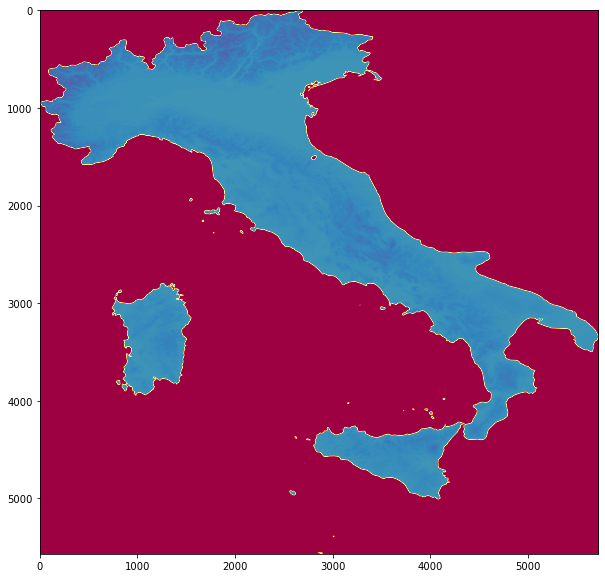

In [18]:
import geopandas as gpd
from shapely.geometry import mapping
from rasterio import mask as msk

df = gpd.read_file('data/ne_10m_admin_0_countries/ne_10m_admin_0_countries.shp')

italy = df.loc[df['ADMIN'] == 'Italy']

clipped_array, clipped_transform = msk.mask(file, [mapping(italy.iloc[0].geometry)], crop=True)

plt.imshow(clipped_array[0], cmap='Spectral')
plt.show()

before 8
after 0


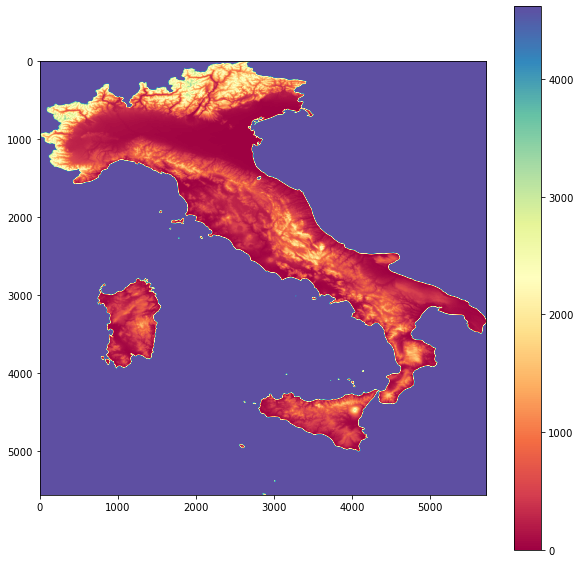

In [30]:
import numpy as np
from rasterio import mask as msk

def clip_raster(gdf, img):
    clipped_array, clipped_transform = msk.mask(img, [mapping(gdf.iloc[0].geometry)], crop=True)
    clipped_array, clipped_transform = msk.mask(img, [mapping(gdf.iloc[0].geometry)],
                                                           crop=True, nodata=(np.amax(clipped_array[0]) + 1))
    
    print('before', abs(np.amin(clipped_array)))
    clipped_array[0] = clipped_array[0] + abs(np.amin(clipped_array))
    print('after', abs(np.amin(clipped_array)))
    value_range = np.amax(clipped_array) + abs(np.amin(clipped_array))
    return clipped_array, value_range

italy_topography, value_range = clip_raster(italy, file)

plt.figure(figsize=(10,10))
c = plt.imshow(italy_topography[0], cmap='Spectral')
plt.colorbar(c)
plt.show()

In [27]:
value_range

4616

In [33]:
from matplotlib.colors import LinearSegmentedColormap
italy_colormap = LinearSegmentedColormap.from_list('italy', ['#008C45', '#0b914c', '#F4F5F0', '#cf2a32', '#CD212A'], N=value_range)

from matplotlib.colors import ListedColormap

background_color = np.array([0.9882352941176471, 0.9647058823529412, 0.9607843137254902, 1.0])
newcolors = italy_colormap(np.linspace(0, 1, value_range))
newcolors = np.vstack((newcolors, background_color))
italy_colormap = ListedColormap(newcolors)

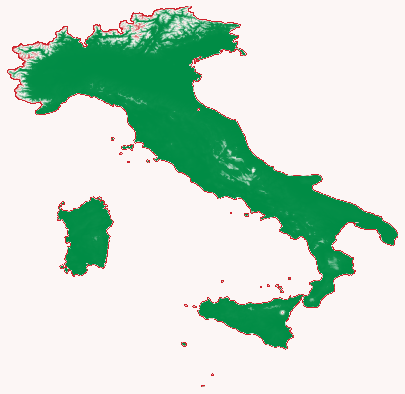

In [34]:
from matplotlib import colors

fig = plt.figure(facecolor='#FCF6F5FF')
fig.set_size_inches(14, 7)
ax = plt.axes()
plt.imshow(italy_topography[0], cmap=italy_colormap)
ax.axis('off')
plt.show()